# Read result file 
    - meta data: available results, mesh, time/freq domain
    - results: displacement and stress

1st step : load dpf client/server, generate documentation if needed

In [1]:
from ansys.dpf import core as dpf

2nd step : create a model

In [2]:
path = r'c:\temp\file_cyclic.rst'
model = dpf.Model(path)
metadata = model.metadata
results = model.results

E0114 22:12:03.613000000 21220 server_chttp2.cc:40] {"created":"@1610658723.613000000","description":"No address added out of total 1 resolved","file":"C:\.conan\9877f9d9b72\1\grpc\src\core\ext\transport\chttp2\server\chttp2_server.cc","file_line":394,"referenced_errors":[{"created":"@1610658723.613000000","description":"Failed to add port to server","file":"C:\.conan\9877f9d9b72\1\grpc\src\core\lib\iomgr\tcp_server_windows.cc","file_line":510,"referenced_errors":[{"created":"@1610658723.613000000","description":"OS Error","file":"C:\.conan\9877f9d9b72\1\grpc\src\core\lib\iomgr\tcp_server_windows.cc","file_line":201,"os_error":"Only one usage of each socket address (protocol/network address/port) is normally permitted.\r\n","syscall":"bind","wsa_error":10048}]}]}

E0114 22:12:04.698000000  4364 server_chttp2.cc:40] {"created":"@1610658724.698000000","description":"No address added out of total 1 resolved","file":"C:\.conan\9877f9d9b72\1\grpc\src\core\ext\transport\chttp2\server\chttp2_

In [3]:
print(metadata.result_info)

Modal analysis
Unit system: Metric (m, kg, N, s, V, A)
Physics Type: Mecanic
Available results:
     -  displacement                  
     -  stress                        
     -  volume                        
     -  energy_stiffness_matrix       
     -  hourglass_energy              
     -  thermal_dissipation_energy    
     -  kinetic_energy                
     -  co_energy                     
     -  incremental_energy            
     -  temperature                   



In [4]:
print(metadata.meshed_region)

Meshed Region
	51 nodes
	4 elements
	Unit: m 



In [5]:
print(metadata.time_freq_support)

Time/Frequency Info:
	Number of sets: 30

With complex values
 
 Cumulative   Frequency (Hz)    Loadstep     Substep     Harmonic index  
     1           6.7e+05           1            1              0         
     2           8.72e+05          1            2              0         
     3           1.14e+06          1            3              0         
     4           1.25e+06          1            4              0         
     5           1.26e+06          1            5              0         
     6           1.35e+06          1            6              0         
     7           6.8e+05           2            1              1         
     8           6.8e+05           2            2              1         
     9           8.99e+05          2            3              1         
     10          8.99e+05          2            4              1         
     11          1.13e+06          2            5              1         
     12          1.13e+06          2            

In [6]:
u = model.results.displacement()

In [7]:
u.inputs.time_scoping.connect([7])

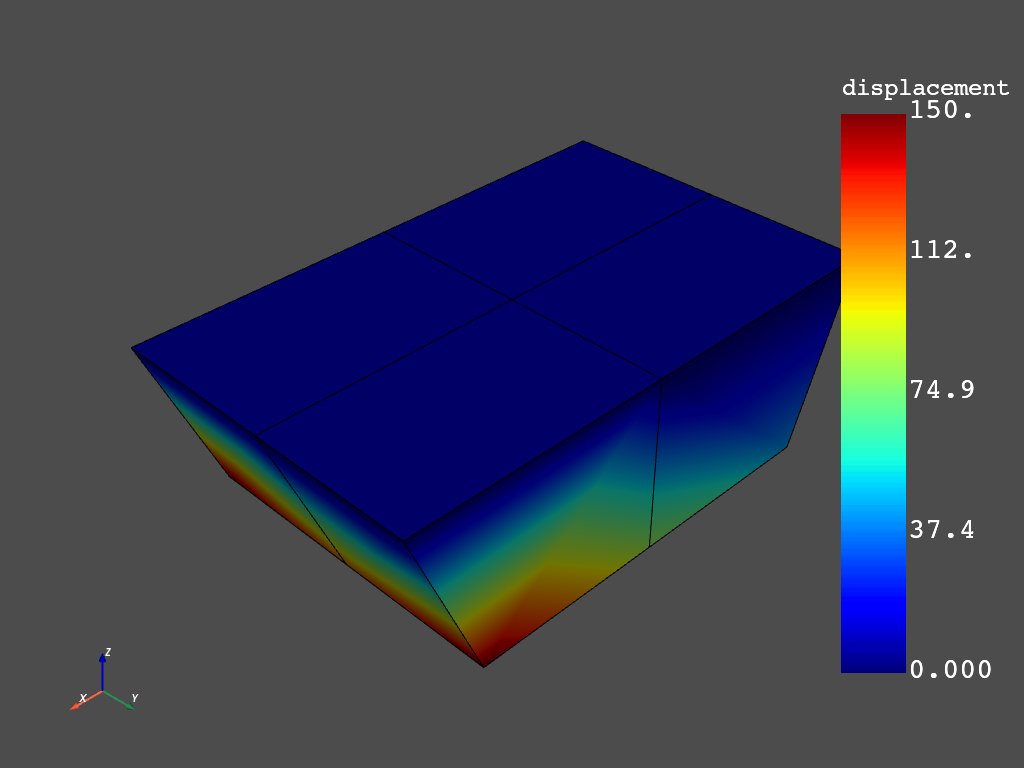

In [8]:
fields = u.outputs.fields_container()
metadata.meshed_region.plot(fields[0])

In [9]:
len(fields)
fields.labels
fields.get_label_space(0)

{'time': 7, 'base_sector': 1}

## expand displacements

In [10]:
displacements = model.operator("mapdl::rst::U_cyclic")

In [11]:
fields = displacements.outputs.fields_container()

In [12]:
disp_field = fields[0]

In [13]:
mesh = displacements.outputs.expanded_meshed_region.get_data()

In [14]:
print(mesh)

Meshed Region
	304 nodes
	32 elements
	Unit: m 



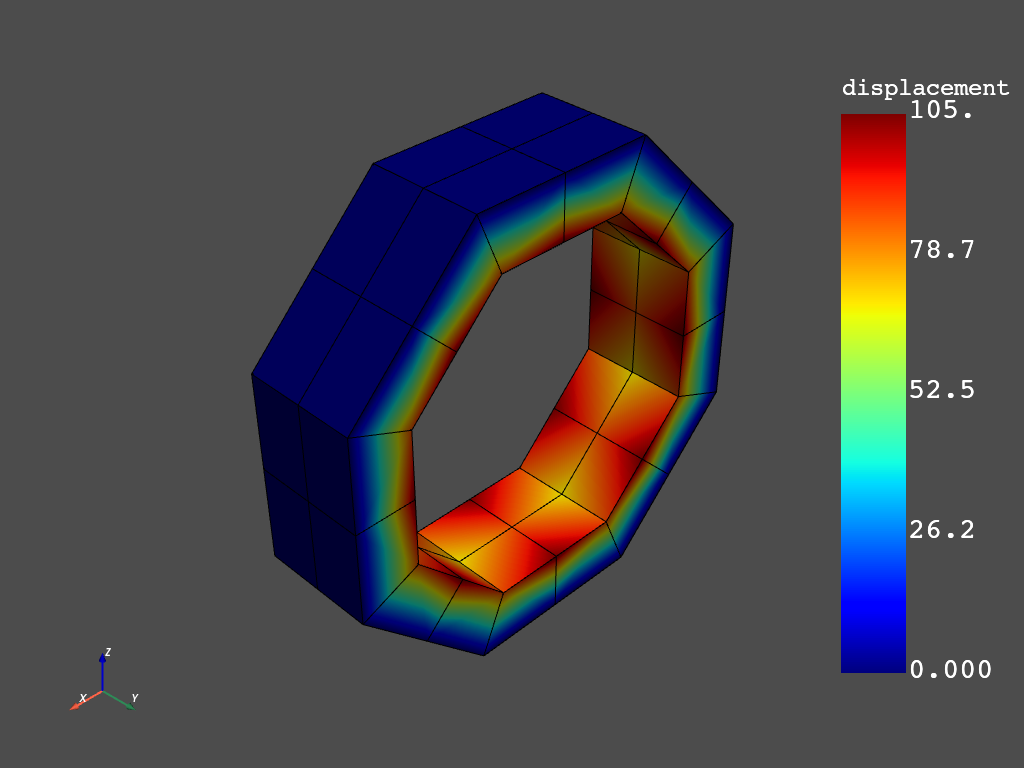

In [15]:
mesh.plot(fields)

In [16]:
print(disp_field)

DPF displacement_670386.325235Hz_base_sector:1 Field
	Location: Nodal
	Unit: m
	304 id(s)
	data size: 912
	shape: (304, 3)



## expand stresses

In [17]:
stress = model.operator("mapdl::rst::S_cyclic")

In [18]:
stress.inputs.requested_location.connect("Nodal")

In [19]:
fields = stress.outputs.fields_container()

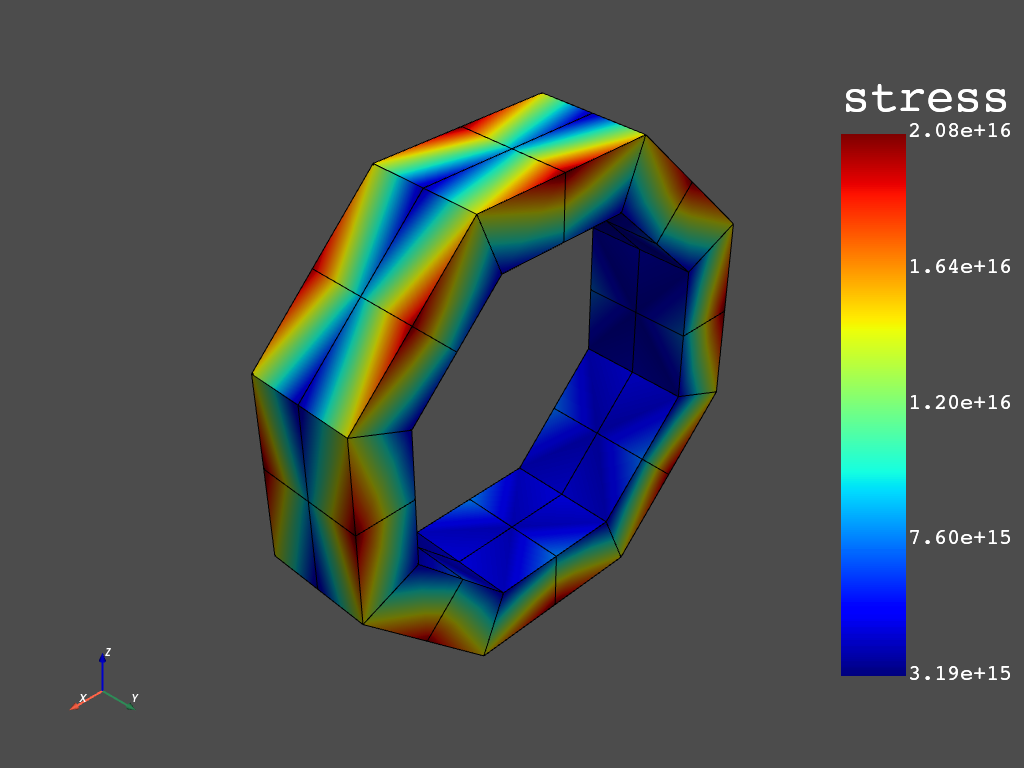

In [20]:
mesh.plot(fields)

## export to vtk

In [21]:
vtk = dpf.Operator("vtk_export")

In [22]:
vtk.inputs.file_path(r'c:/temp/file.vtk')
vtk.inputs.fields1.connect(displacements.outputs.fields_container)
vtk.inputs.fields2.connect(stress.outputs.fields_container)
vtk.run()